In [75]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os

In [76]:
# Load the audio file
data, sample_rate = librosa.load(r'C:\Users\prava\OneDrive\Desktop\IIITD Coursework\Sem7\ML\ml_project\Guest-Speaker-Recognition\archive\16000_pcm_speeches\Benjamin_Netanyau\1.wav')

def discrete_fourier_transform(audio_path):
    # Perform the Fourier transform
    data, sample_rate = librosa.load(audio_path)
    frequencies = np.fft.rfftfreq(data.size, d=1./sample_rate)
    fft_values = np.fft.rfft(data)

    # Plot the frequency spectrum
    plt.plot(frequencies, np.abs(fft_values))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

In [77]:
def pitch_tracking(audio_path):
    data, sample_rate = librosa.load(audio_path)
    # Estimate the pitch track
    pitches, magnitudes = librosa.piptrack(y = data, sr = sample_rate)

    # Select out pitches with high enough magnitudes (median is chosen as the comparing metric)
    pitches = pitches[magnitudes > np.median(magnitudes)]

    # Plot the pitch track
    plt.plot(pitches)
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.show()

In [78]:
audio_files_dir = r'archive/16000_pcm_speeches'
dir_dict = {}

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name.endswith('.py') or class_name.endswith('.ipynb_checkpoints')):
        continue
        
    class_dir = os.path.join(audio_files_dir, class_name)
    
    if os.path.isdir(class_dir):
        print(type(os.listdir(class_dir)[0]))
        audio_files_list = []
        
        for audio_file in os.listdir(class_dir):
            
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(class_dir, audio_file)
                audio_files_list.append(audio_file_path)
        
        dir_dict[class_dir] = audio_files_list
        
print(len(dir_dict))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
7


archive/16000_pcm_speeches\Benjamin_Netanyau


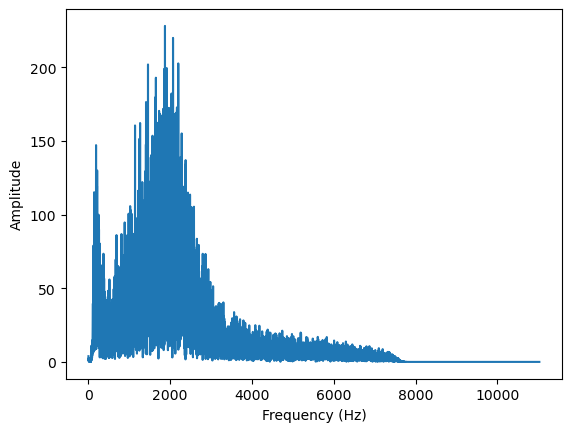

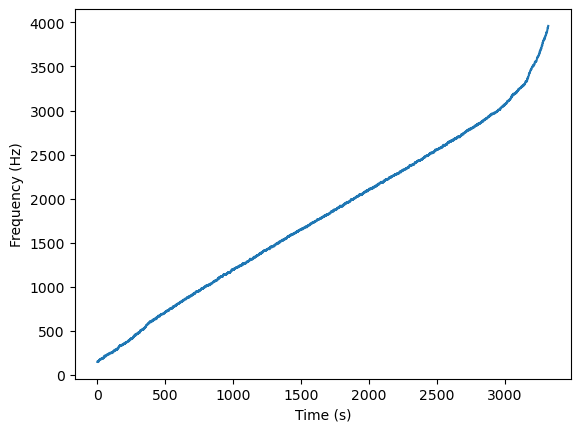

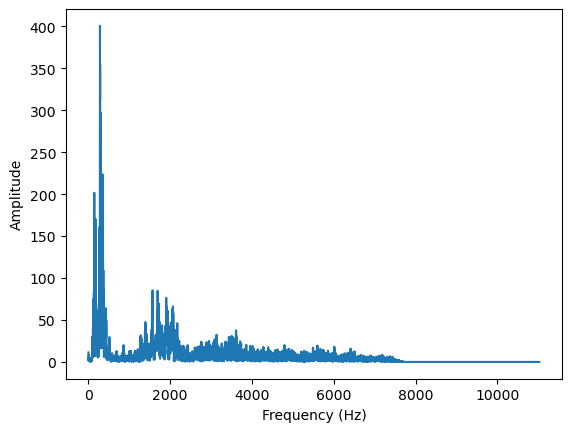

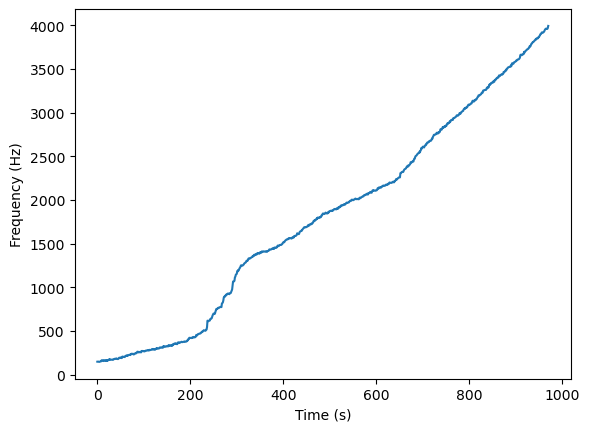

archive/16000_pcm_speeches\Jens_Stoltenberg


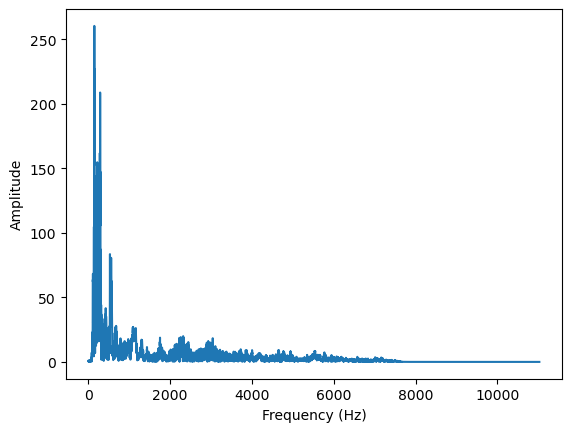

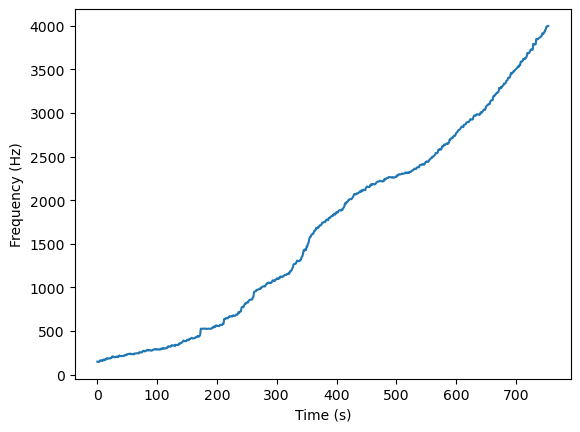

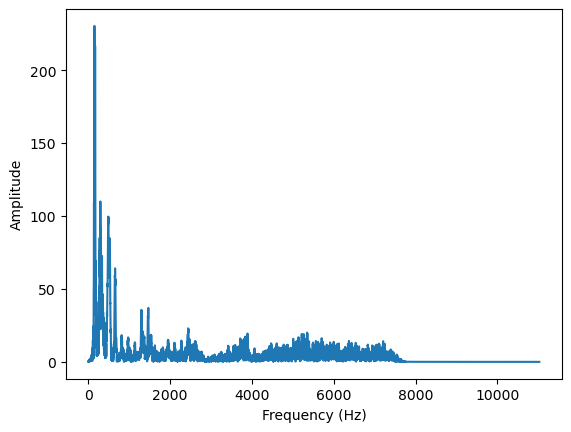

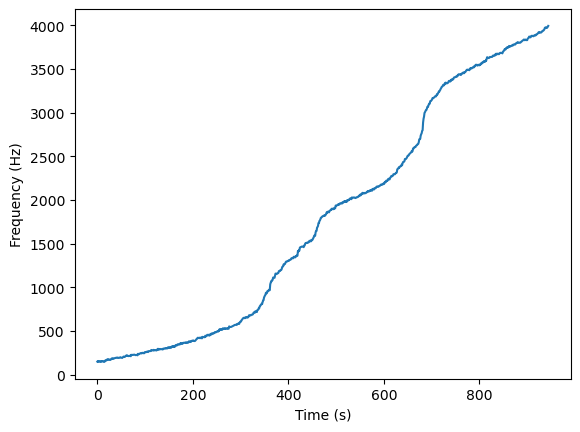

archive/16000_pcm_speeches\Julia_Gillard


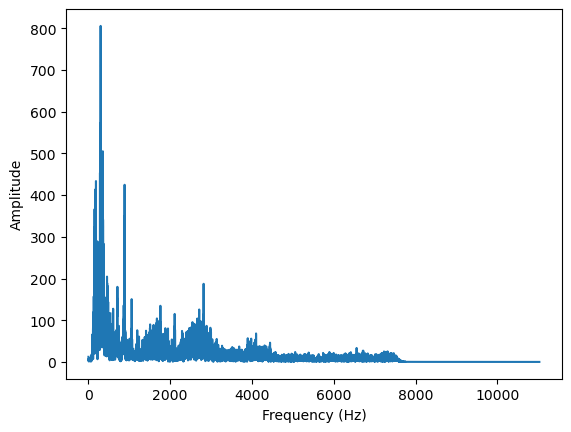

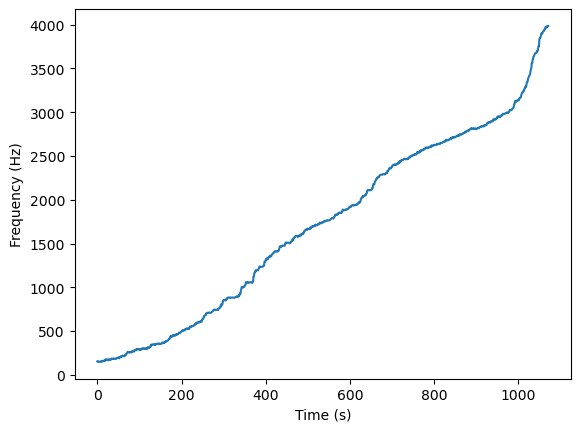

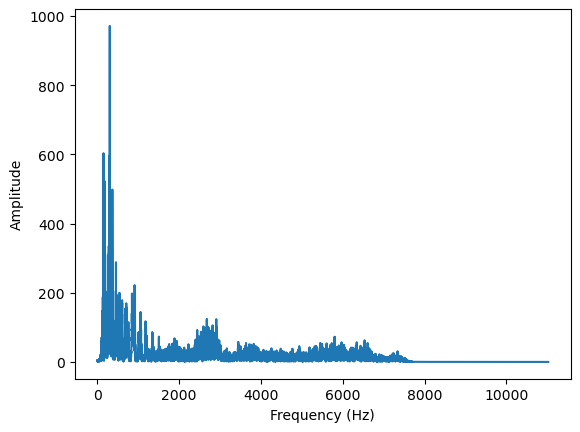

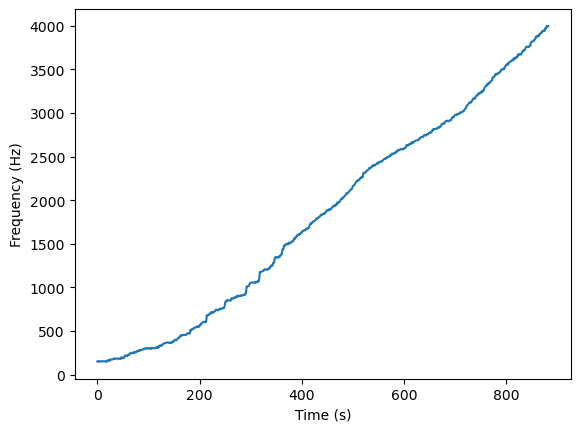

archive/16000_pcm_speeches\Magaret_Tarcher


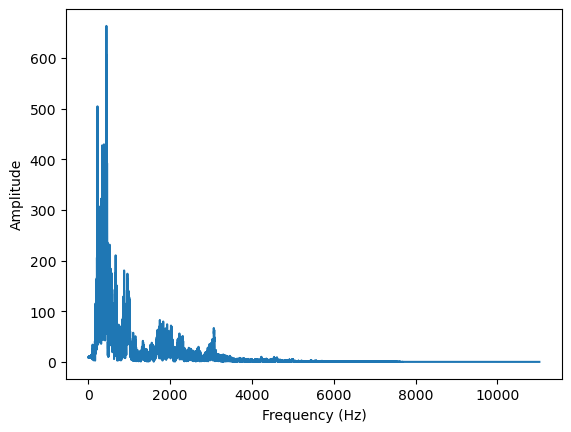

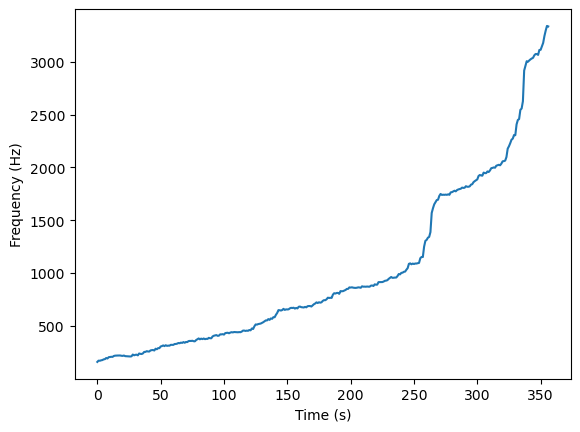

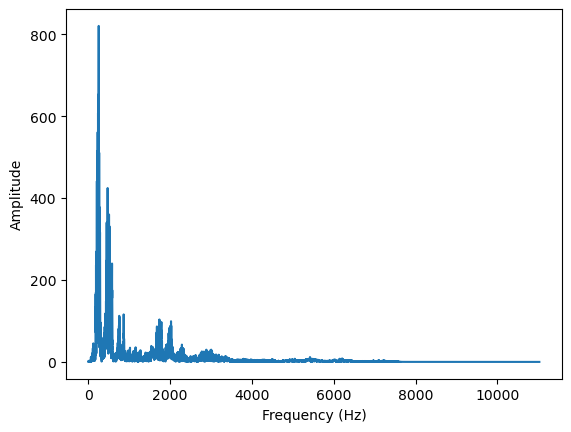

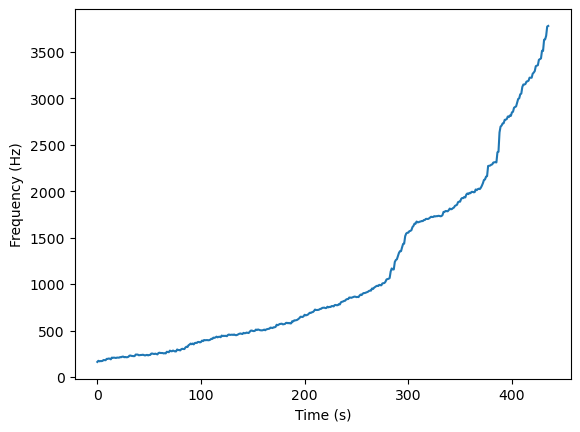

archive/16000_pcm_speeches\Nelson_Mandela


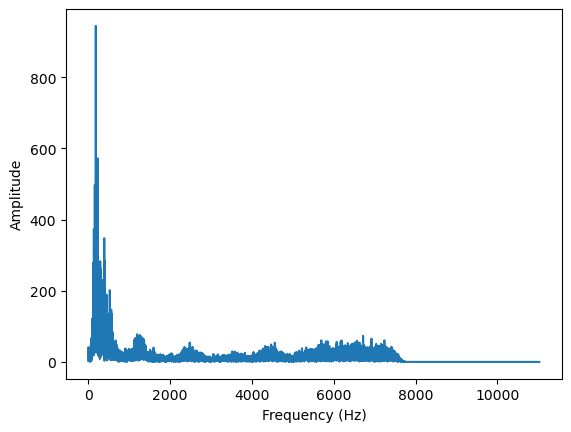

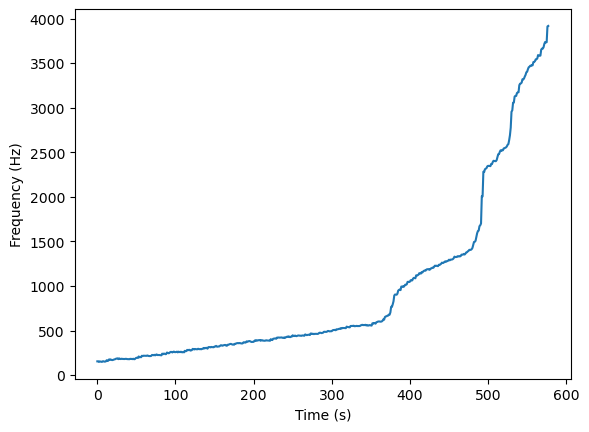

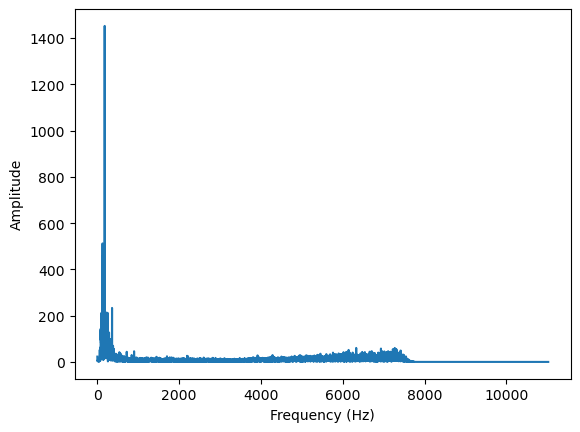

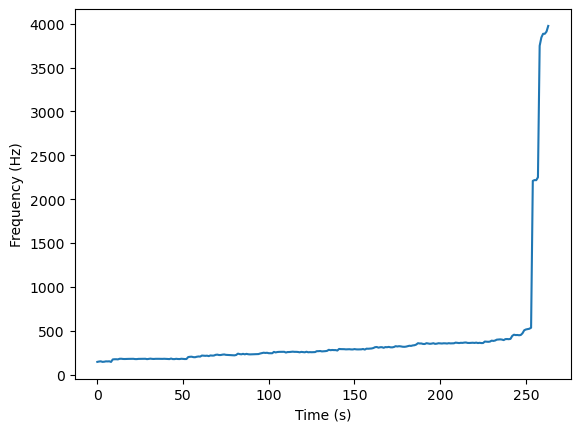

archive/16000_pcm_speeches\other


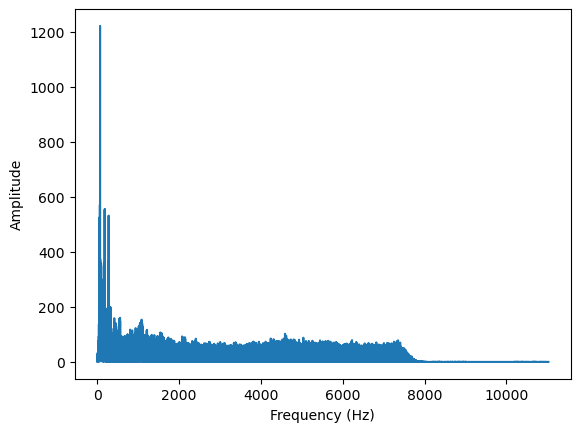

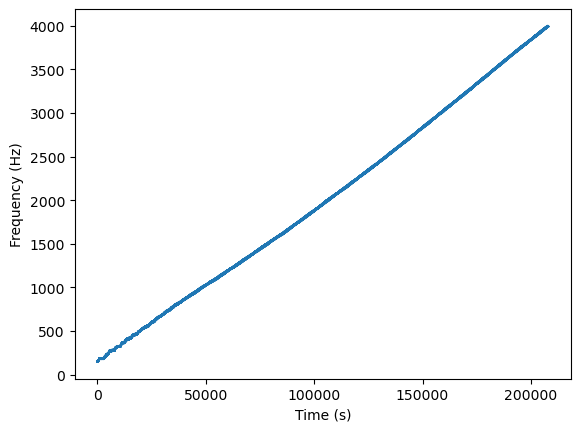

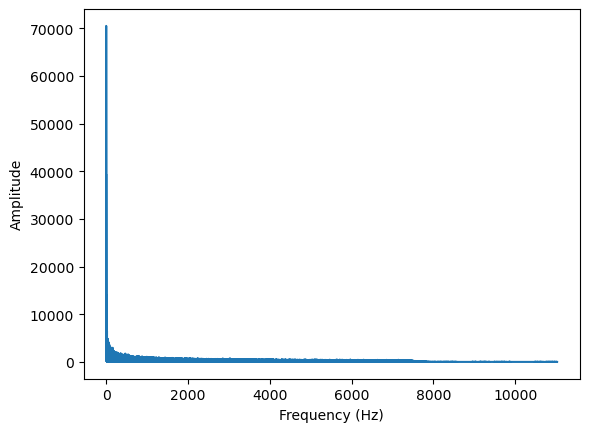

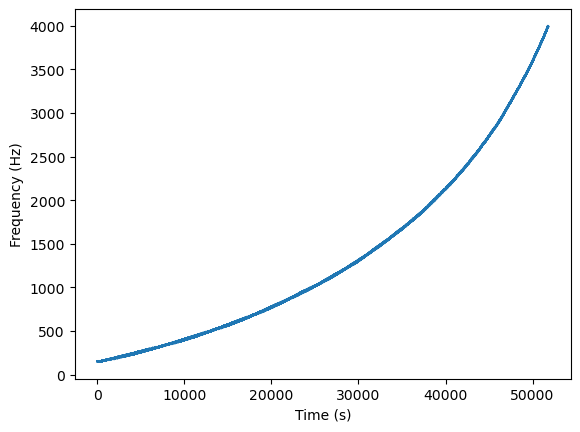

archive/16000_pcm_speeches\_background_noise_


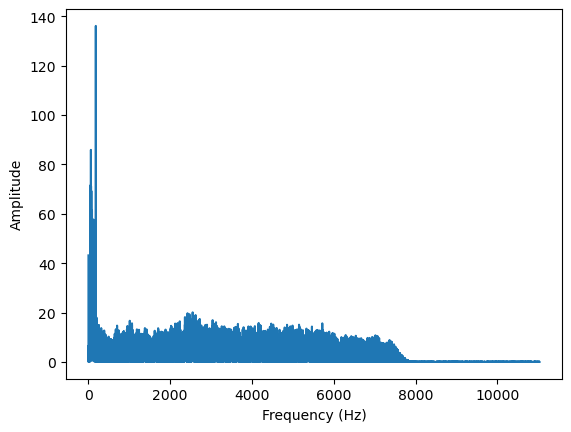

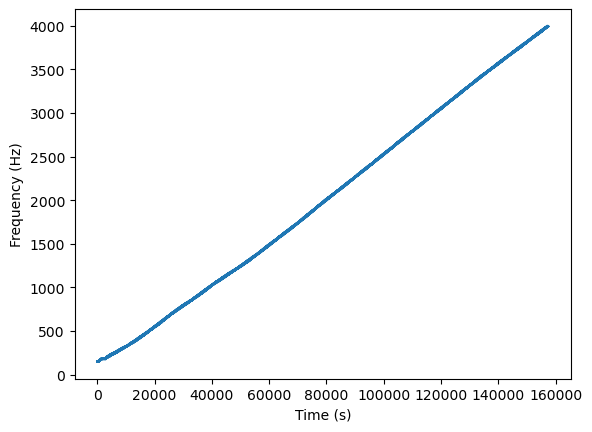

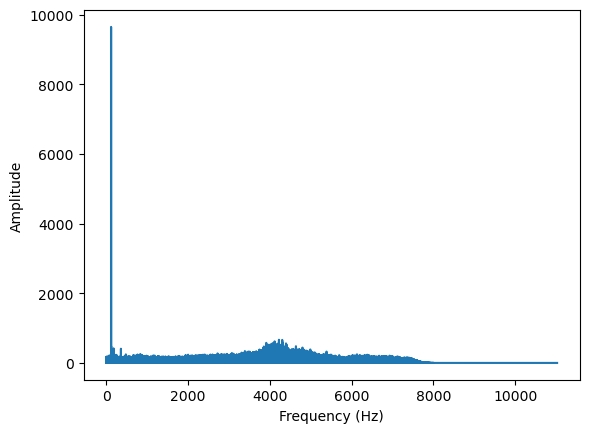

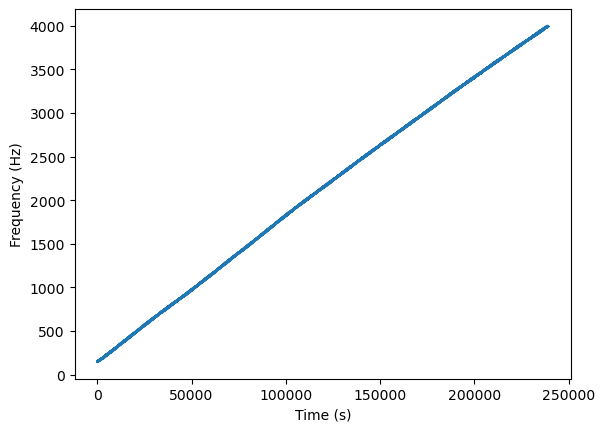

In [79]:
import random

for class_name in dir_dict:
    audio_paths = dir_dict[class_name]
    print(class_name)
    random_audio_paths = random.sample(audio_paths, 2)
    for audio_path in random_audio_paths:
        discrete_fourier_transform(audio_path)
        pitch_tracking(audio_path)